In [113]:
#Assignment 3

In [114]:
#a) - #e) on paper

In [202]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [273]:
import numpy as np
from astropy import constants as cn
from astropy import units as un
import matplotlib.pyplot as plt
import scipy.integrate as spi
from scipy.integrate import odeint

In [357]:
#defining constants
a = 7.565e-16
X = 0.7
Y = 0.28
Z = 0.2
mu = 1.0 / (2.0*X +(3.0/4.0)*Y +2.0*Z)
sigma = (cn.sigma_sb).value
c = (cn.c).value
G = (cn.G).value
L_sun = (cn.L_sun).value
R_sun = (cn.R_sun).value
M_sun = (cn.M_sun).value
kB = (cn.k_B).value
pi = np.pi

In [358]:
def rhofunc(y, r):
    Mr, Lr, T, P = y
    rho0 = (P - a*T**4.0/3.0) * (mu/(kB*T))
    return rho0

In [373]:
def kappa(y, r):
    Mr, Lr, T, P = y
    gbf = 1.0
    gff = 1.0
    t = 10.0
    kbf=(4.3e21) * (gbf/t)* Z * (1.0+X) * (rhofunc(y, r) / np.power(T,3.5))
    ke = 0.02 * (1.0 + X)
    kff=(3.7e18) * gff * (1.0-Z) * (1.0+X) * (rhofunc(y, r) / np.power(T,3.5))
    kappa0=((ke + kbf +kff)/3.0) * .01 #conversion
    #kappa0=((kbf+kff+kbb) / 3.0) * 0.1 #conversion
    return kappa0

In [374]:
def epsilon(y, r):
    Mr, Lr, T, P = y
    epsKnot_pp = 1.08e-12
    epsKnot_cno = 8.24e-31
    X_h = 0.64
    X_cno = 0.34
    eps_pp = epsKnot_pp * rhofunc(y, r) * X_h**2 * (T / 1e6)**4.0
    eps_cno = epsKnot_cno * rhofunc(y, r) * X_h * X_cno * (T / 1e6)**(19.9)
    eps0 = eps_pp + eps_cno
    return eps0

In [375]:
def dm_dr(y, r):
    Mr, Lr, T, P = y
    dmdr0 = 4.0 * rhofunc(y, r) * pi * r**2
    return dmdr0

In [376]:
def dp_dr(y, r):
    Mr, Lr, T, P = y
    dpdr0 = -(G * M_sun * rhofunc(y, r)) / r**2
    return dpdr0

In [377]:
def dl_dr(y, r):
    Mr, Lr, T, P = y
    dldr0 = 4.0 * epsilon(y, r) * rhofunc(y, r) * pi * r**2
    return dldr0

In [378]:
def dt_dr(y, r):
    Mr, Lr, T, P = y
    dtdr0 = -(3.0* kappa(y, r) * rhofunc(y, r) * Lr) / (16.0 * a * c * T**3 * pi * r**2)
    return dtdr0

In [379]:
def main(y, r):
    Mr, Lr, T, P = y
    DiffEQs = [dm_dr(y,r), dl_dr(y,r), dt_dr(y,r), dp_dr(y,r)]
    return DiffEQs

In [380]:
#initial conditions
T_knot = 15.6e6
Lr_knot = 0.0
P_knot = 2.3e16
Mr_knot = 0.0
y_knot = [Mr_knot, Lr_knot, T_knot, P_knot]

In [381]:
#make radius array for solution
r = np.logspace(np.log10(0.01 * R_sun), np.log10(R_sun), num = 100)

In [382]:
#call the ODE solver
rsolN = odeint(main, y_knot, r)
print rsolN

Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
[[  0.00000000e+000   0.00000000e+000   1.56000000e+007   2.30000000e+016]
 [  1.34899922e+001   4.81971550e+025   1.43115878e+006   2.30000000e+016]
 [  9.88131292e-323   6.90424490e-310   6.90412551e-310   9.88131292e-324]
 [  6.90412551e-310   7.35566515e-316   9.88131292e-324   9.88131292e-323]
 [  6.90424606e-310   6.90412551e-310   4.94065646e-324   7.35567977e-316]
 [  9.88131292e-323   1.69759663e-313   1.48219694e-323   7.35567384e-316]
 [  7.35567661e-316   7.35567937e-316   9.88131292e-323   6.90427218e-310]
 [  4.94065646e-324   6.90412551e-310   6.90427218e-310   4.94065646e-324]
 [  3.18299369e-313   6.90412551e-310   6.90424490e-310   3.18299369e-313]
 [  6.90412551e-310   6.90424490e-310   3.39519327e-313   4.45619116e-313]
 [  9.88131292e-323   6.90427219e-310   4.45619116e-313   6.90412551e-310]
 [  6.90427219e-310   3.39519327e-313   6.15378779e-313   0.

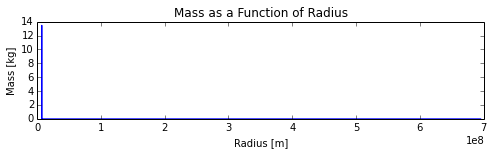

In [383]:
#plot dmdr
fig = plt.figure(1, figsize=(8,8))
dmdrGraph = fig.add_subplot(411)
dmdrGraph.plot(r, rsolN[:,0])
dmdrGraph.set_xlabel('Radius [m]')
dmdrGraph.set_ylabel('Mass [kg]')
dmdrGraph.set_title('Mass as a Function of Radius')

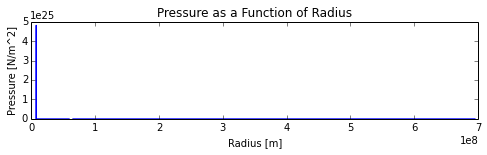

In [384]:
#plot dpdr
fig = plt.figure(2, figsize=(8,8))
dpdrGraph = fig.add_subplot(412)
dpdrGraph.plot(r, rsolN[:,1])
dpdrGraph.set_xlabel('Radius [m]')
dpdrGraph.set_ylabel('Pressure [N/m^2]')
dpdrGraph.set_title('Pressure as a Function of Radius')

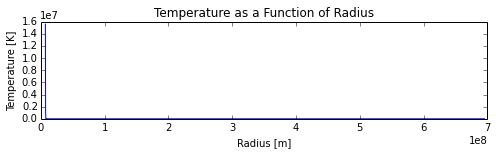

In [385]:
#plot dtdr
fig = plt.figure(3, figsize=(8,8))
dtdrGraph = fig.add_subplot(413)
dtdrGraph.plot(r, rsolN[:,2])
dtdrGraph.set_xlabel('Radius [m]')
dtdrGraph.set_ylabel('Temperature [K]')
dtdrGraph.set_title('Temperature as a Function of Radius')

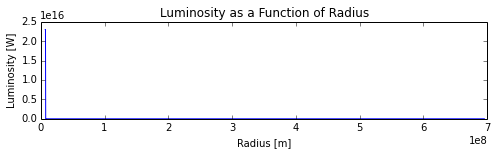

In [386]:
#plot dldr
fig = plt.figure(4, figsize=(8,8))
dldrGraph = fig.add_subplot(414)
dldrGraph.plot(r, rsolN[:,3])
dldrGraph.set_xlabel('Radius [m]')
dldrGraph.set_ylabel('Luminosity [W]')
dldrGraph.set_title('Luminosity as a Function of Radius')